#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [ ]:
fc = nn.Linear(in_features=10, out_features=5)
fc

Linear(in_features=10, out_features=5, bias=True)

In [ ]:
fc.weight

In [ ]:
fc.weight.data = th.ones_like(fc.weight)

In [ ]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
# fc1 = nn.Linear(4, 10)
# relu = nn.ReLU()
# fc2 = nn.Linear(10, 1)
# out =
# out =
# out =

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out):
    super().__init__() # вызываем конструктор родителя
    self.fc1 = nn.Linear(n_inputs, n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(n_hidden, n_out)

  def forward(self, X):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
n_inputs = 4
n_hidden = 10
n_out = 1

net = nn.Sequential(
    nn.Linear(n_inputs, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_out)
)
net(X)

In [ ]:
net = FullyConnectedNet(4, 10, 1)
out = net(X)
out

In [ ]:
net.parameters()

<generator object Module.parameters at 0x7bb8926c8b30>

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [ ]:
dropout = nn.Dropout(p=0.5)

In [ ]:
X = th.randn(size=(5, 5))
X

tensor([[ 0.6584, -0.0660,  0.7526,  0.3322,  0.5273],
        [-0.6124,  2.2704, -1.1058,  0.1783, -0.7886],
        [ 1.3501,  0.8081, -0.1475, -0.3167, -0.4661],
        [-0.1645, -1.7053, -0.4367, -0.4543,  0.2426],
        [ 0.9185,  0.0203,  0.6589,  0.7125, -0.1901]])

In [ ]:
dropout(X)

tensor([[ 0.0000, -0.0000,  1.5052,  0.6644,  0.0000],
        [-1.2248,  4.5409, -0.0000,  0.0000, -1.5771],
        [ 0.0000,  1.6162, -0.2950, -0.0000, -0.0000],
        [-0.3290, -3.4105, -0.8735, -0.0000,  0.4852],
        [ 0.0000,  0.0000,  0.0000,  1.4251, -0.0000]])

In [ ]:
dropout.eval()

Dropout(p=0.5, inplace=False)

In [ ]:
dropout(X)

tensor([[ 0.6584, -0.0660,  0.7526,  0.3322,  0.5273],
        [-0.6124,  2.2704, -1.1058,  0.1783, -0.7886],
        [ 1.3501,  0.8081, -0.1475, -0.3167, -0.4661],
        [-0.1645, -1.7053, -0.4367, -0.4543,  0.2426],
        [ 0.9185,  0.0203,  0.6589,  0.7125, -0.1901]])

In [ ]:
dropout.train()

Dropout(p=0.5, inplace=False)

In [ ]:
dropout(X)

tensor([[ 1.3168, -0.1320,  0.0000,  0.6644,  1.0546],
        [-1.2248,  4.5409, -2.2116,  0.0000, -1.5771],
        [ 2.7001,  1.6162, -0.0000, -0.0000, -0.9322],
        [-0.0000, -3.4105, -0.8735, -0.9085,  0.0000],
        [ 1.8370,  0.0000,  1.3178,  0.0000, -0.3802]])

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out, p=0.5):
    super().__init__() # вызываем конструктор родителя
    self.fc1 = nn.Linear(n_inputs, n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(n_hidden, n_out)
    self.dropout = nn.Dropout(p=p)

  def forward(self, X):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
net = FullyConnectedNet(4, 10, 1)
# net.eval()
out = net(X)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [ ]:
bn = nn.BatchNorm1d(num_features=4)

In [ ]:
out = bn(X)
out.mean(dim=0), out.std(dim=0)

(tensor([ 1.1921e-09,  9.5367e-09,  2.3842e-09, -5.9605e-09],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>))

In [ ]:
bn.running_mean

tensor([ 0.0043,  0.0083,  0.0064, -0.0019])

In [ ]:
bn.running_var

tensor([1.0171, 0.9933, 0.9823, 0.9532])

In [ ]:
bn.eval()

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out, p=0.5):
    super().__init__() # вызываем конструктор родителя
    self.fc1 = nn.Linear(n_inputs, n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(n_hidden, n_out)
    self.dropout = nn.Dropout(p=p)
    self.bn1 = nn.BatchNorm1d(n_hidden)

  def forward(self, X):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.bn1(out)
    out = self.dropout(out)
    out = self.fc2(out)
    # не вставляют обычно фун-цию активации/батч норм/дропаут
    return out

## Задачи для самостоятельного решения

In [95]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init`. Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [37]:
class InitializedLinear(nn.Linear):
  def __init__(self, n_features, n_hidden, init_f=nn.init.uniform_, init_args={'a': 0.0, 'b': 1.0}):
    super().__init__(n_features, n_hidden)
    self.weight = init_f(self.weight, **init_args)

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

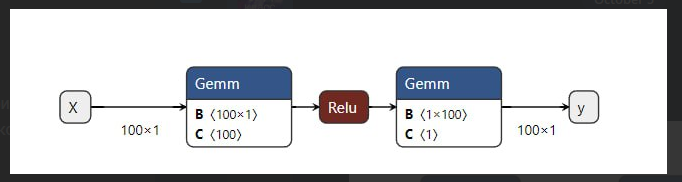

- [ ] Проверено на семинаре

In [8]:
import torch as th
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [9]:
initializers = [
    (nn.init.uniform_, {'a': 1.0, 'b': 10.0}),
    (nn.init.normal_, {'mean': 2.0, 'std': 5.0}),
    (nn.init.constant_, {'val': 5.0}),
    (nn.init.xavier_uniform_, {'gain': 2.0}),
    (nn.init.kaiming_uniform_, {'a': 0, 'mode': 'fan_in', 'nonlinearity': 'relu'})
]

In [35]:
results = []
crit = nn.MSELoss()
lr = 0.1
n_epoch = 100

for init in initializers:
  model = nn.Sequential(
      InitializedLinear(1, 100, *init),
      nn.ReLU(),
      InitializedLinear(100, 1, *init)
  )
  optimizer = optim.SGD(model.parameters(), lr=lr)
  loss_curve = []
  for epoch in range(n_epoch):
    out = model(X)
    loss = crit(out, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_curve.append((epoch, loss.item()))
  results.append(loss_curve)

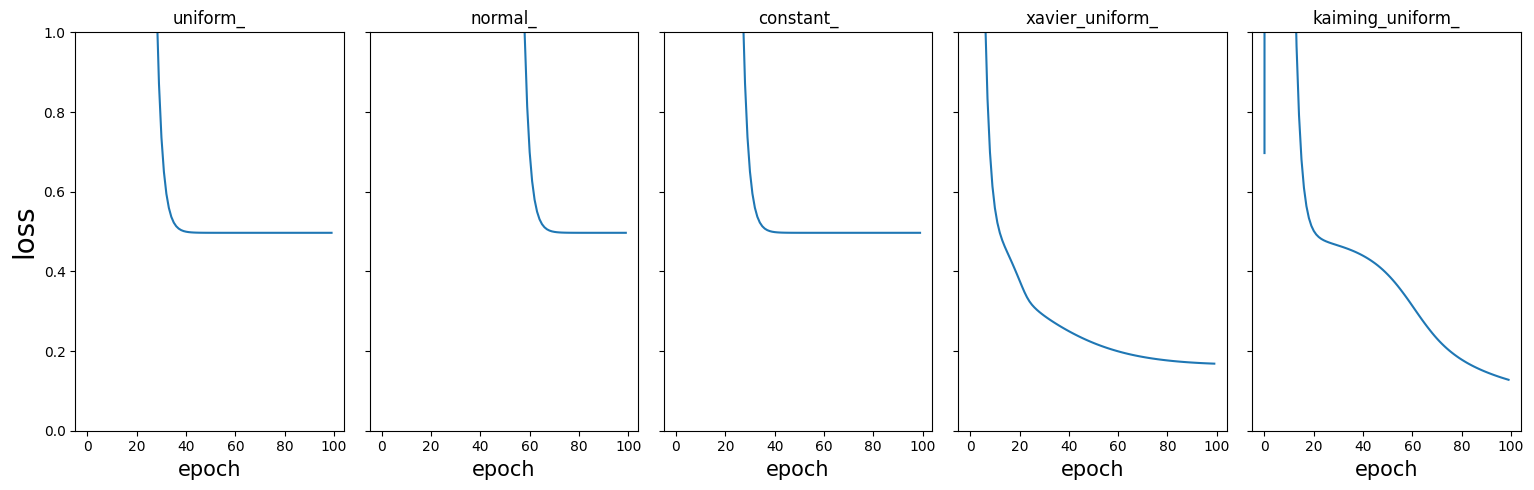

In [36]:
fig, axes = plt.subplots(ncols=5, sharey=True, figsize=(15, 5))
for i, res in enumerate(results):
  axes[i].plot(list(map(lambda x: x[0], res)),
               list(map(lambda x: x[1], res)))
  axes[i].set_xlabel('epoch', fontsize=15)
  axes[i].set_title(str(initializers[i][0]).split()[1])
plt.tight_layout()
plt.ylim([0, 1])
axes[0].set_ylabel('loss', fontsize=20);

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

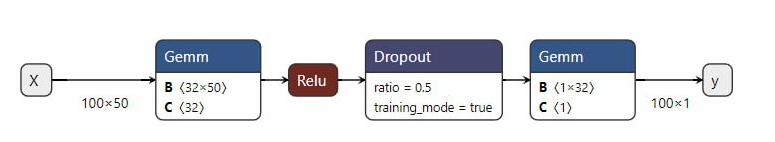

- [ ] Проверено на семинаре

In [124]:
from sklearn.datasets import make_regression
import torch as th

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
results = []
crit = nn.MSELoss()
lr = 0.001
n_epoch = 100
nets = [(P, nn.Sequential(
    nn.Linear(50, 32),
    nn.ReLU(),
    nn.Dropout(p=P),
    nn.Linear(32, 1)
)) for P in [0, 0.25, 0.5, 0.65, 0.8]]

for net in nets:
  p = net[0]
  model = net[1]
  optimizer = optim.SGD(model.parameters(), lr=lr)
  r2_curve = []
  for epoch in range(n_epoch):
    out = model(X_train)
    model.eval()
    pred_test = model(X_test).detach().numpy()
    model.train()
    loss = crit(out, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    r2_curve.append((epoch,
                     r2_score(y_train.detach().numpy(), out.detach().numpy()),
                     r2_score(y_test.numpy(), pred_test)))
  results.append((p, r2_curve))

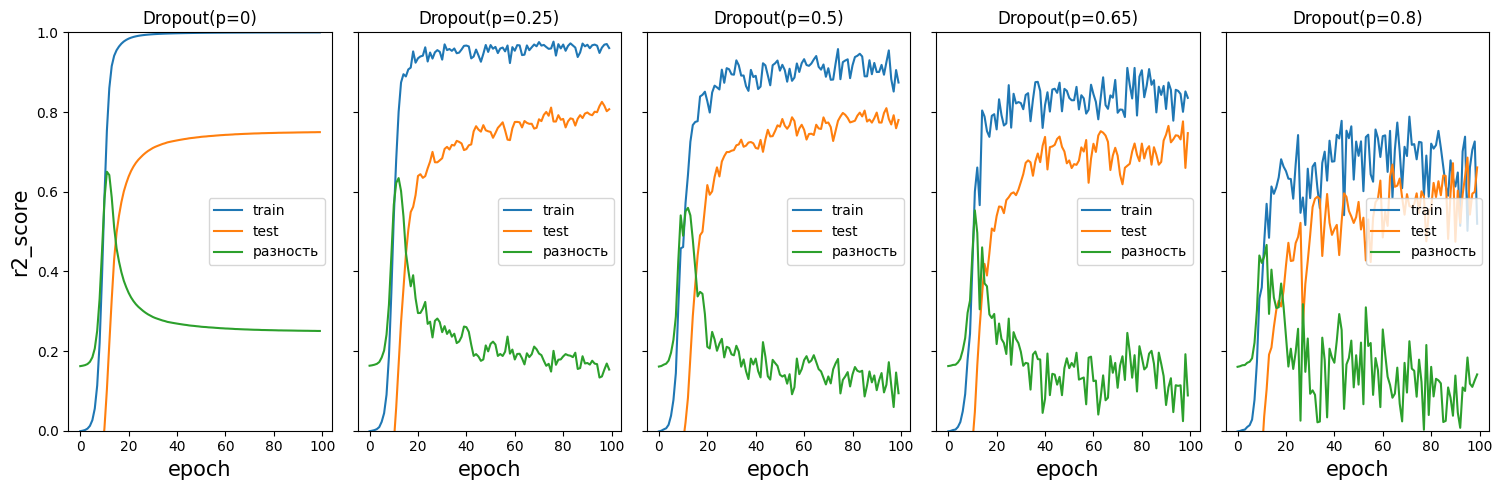

In [130]:
fig, axes = plt.subplots(ncols=5, sharey=True, figsize=(15, 5))
diffs = []
for i, res in enumerate(results):
  epochs = list(map(lambda x: x[0], res[1]))
  r2_train = list(map(lambda x: x[1], res[1]))
  r2_test = list(map(lambda x: x[2], res[1]))
  axes[i].plot(epochs, r2_train, label='train')
  axes[i].plot(epochs, r2_test, label='test')
  razn = list(map(lambda x: abs(x[0] - x[1]), zip(r2_train, r2_test)))
  axes[i].plot(epochs, razn, label='разность')

  axes[i].set_xlabel('epoch', fontsize=15)
  axes[i].set_title(f'Dropout(p={res[0]})')
  axes[i].legend(loc='center right')
plt.tight_layout()
plt.ylim([0, 1])
axes[0].set_ylabel('r2_score', fontsize=15);

<p class="task" id="4"></p>

4\. Решите задачу регрессии с- и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

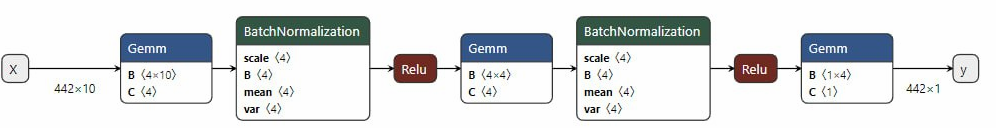

- [ ] Проверено на семинаре

In [41]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()

In [42]:
class ModelNormalization(nn.Module):
  def __init__(self, n_features, n_hidden, n_out, norm=True):
    super().__init__()
    if norm:
      self.seq = nn.Sequential(
                        nn.Linear(n_features, n_hidden),
                        nn.BatchNorm1d(n_hidden),
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_hidden),
                        nn.BatchNorm1d(n_hidden),
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_out)
                        )
    else:
      self.seq = nn.Sequential(
                        nn.Linear(n_features, n_hidden),
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_hidden),
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_out)
                        )
  def forward(self, X):
    out = self.seq(X)
    return out

In [51]:
results = []
crit = nn.MSELoss()
n_epoch = 100


for lr in [0.1, 0.01, 0.5]:
  model_norm = ModelNormalization(10, 4, 1, norm=True)
  model_not_norm = ModelNormalization(10, 4, 1, norm=False)
  optimizer1 = optim.SGD(model_norm.parameters(), lr=lr)
  optimizer2 = optim.SGD(model_not_norm.parameters(), lr=lr)
  r2_curve_norm = []
  r2_curve_not_norm = []
  for epoch in range(n_epoch):
    out1 = model_norm(X)
    out2 = model_not_norm(X)
    loss1 = crit(out1, y)
    loss2 = crit(out2, y)
    loss1.backward()
    loss2.backward()
    optimizer1.step()
    optimizer2.step()
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    r2_curve_norm.append((epoch,
                          r2_score(y.detach().numpy(), out1.detach().numpy())))
    r2_curve_not_norm.append((epoch,
                              r2_score(y.detach().numpy(), out2.detach().numpy())))

  results.append((lr, r2_curve_norm))
  results.append((lr, r2_curve_not_norm))

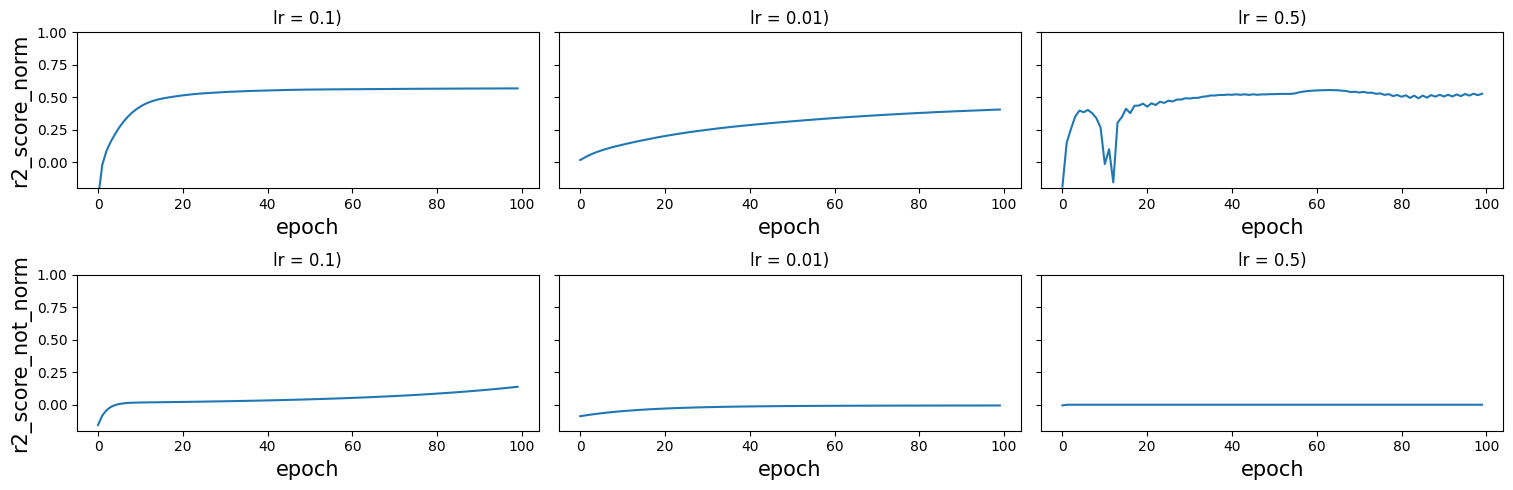

In [67]:
fig, axes = plt.subplots(ncols=3, nrows=2, sharey=True, figsize=(15, 5))
for i, res in enumerate(results):
  nrow = i % 2
  ncol = i // 2
  axes[nrow][ncol].plot(list(map(lambda x: x[0], res[1])),
                     list(map(lambda x: x[1], res[1])))

  axes[nrow][ncol].set_xlabel('epoch', fontsize=15)
  axes[nrow][ncol].set_title(f'lr = {res[0]})')
plt.tight_layout()
plt.ylim([-0.2, 1])
axes[0][0].set_ylabel('r2_score_norm', fontsize=15)
axes[1][0].set_ylabel('r2_score_not_norm', fontsize=15);

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

In [72]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [73]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [74]:
optimizers = [
    optim.SGD,
    optim.Adam,
    optim.Adagrad,
    optim.RMSprop
]

In [103]:
results = []
crit = nn.MSELoss()
lr = 0.01
n_hidden = 4
n_epoch = 100

for opt in optimizers:
  model = nn.Sequential(
    nn.Linear(X.shape[1], n_hidden),
    nn.BatchNorm1d(n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_hidden),
    nn.BatchNorm1d(n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, 1)
  )
  optimizer = opt(model.parameters(), lr=lr)
  mape_curve = []
  for epoch in range(n_epoch):
    out = model(X)
    loss = crit(out, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    mape_curve.append((epoch,
                       mean_absolute_percentage_error(y.detach().numpy(), out.detach().numpy())))
  results.append(mape_curve)

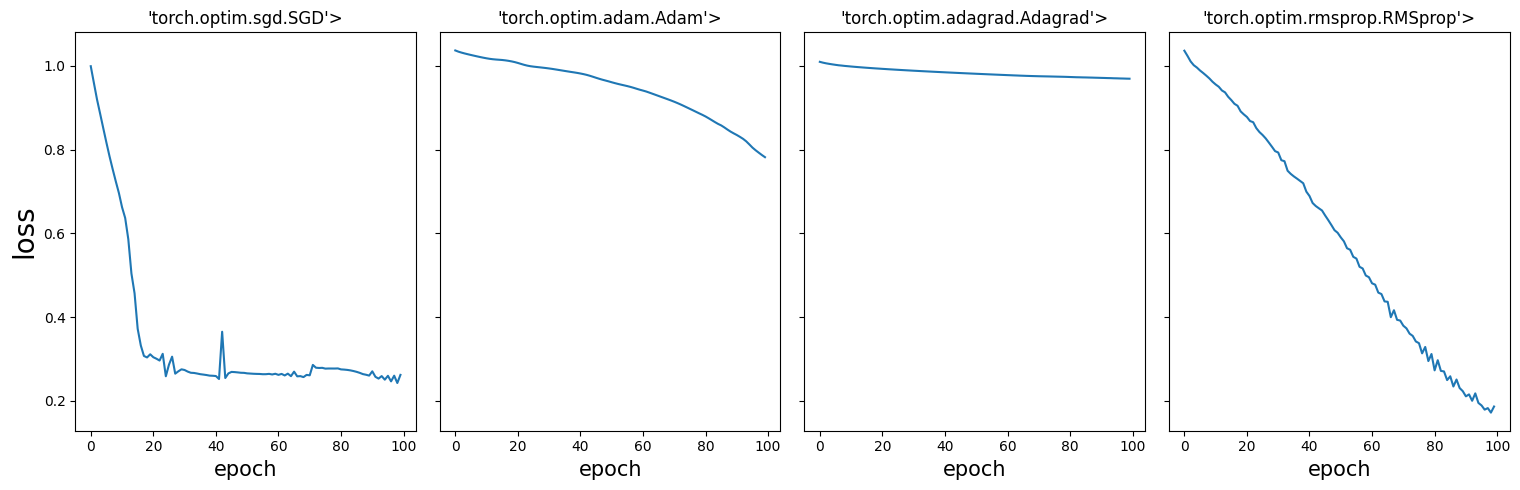

In [104]:
fig, axes = plt.subplots(ncols=4, sharey=True, figsize=(15, 5))
for i, res in enumerate(results):
  axes[i].plot(list(map(lambda x: x[0], res)),
               list(map(lambda x: x[1], res)))
  axes[i].set_xlabel('epoch', fontsize=15)
  axes[i].set_title(str(optimizers[i]).split()[1])
plt.tight_layout()
axes[0].set_ylabel('loss', fontsize=20);

<p class="task" id="6"></p>

6\. Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не увеличивалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

In [105]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
n_hidden=4
model = nn.Sequential(
    nn.Linear(X_train.shape[1], n_hidden),
    nn.BatchNorm1d(n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_hidden),
    nn.BatchNorm1d(n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, 1)
)
k = 5
optimizer = optim.SGD(model.parameters(), lr=0.1)
epoch = 0
mape = 0
check = 1
while True:
  epoch += 1
  out = model(X_train)
  loss = crit(out, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  metric = mean_absolute_percentage_error(y_train.detach().numpy(), out.detach().numpy())
  if (mape == metric):
    check += 1
  else:
    mape = metric
    check = 1
  if check == k:
    print(f'{epoch=}')
    break

epoch=79


In [123]:
out_test = model(X_test)
print(f'MAPE_train: {mape:.5f}')
print(f'MAPE_test: {mean_absolute_percentage_error(y_test.detach().numpy(), out_test.detach().numpy()):.5f}')

MAPE_train: 0.36789
MAPE_test: 0.37673


## Обратная связь
- [ ] Хочу получить обратную связь по решению